# Womens International Football EDA

Hello Kaggler, this is my first notebook so I'm putting this out here first and foremost for feedback and not for any new insights I think I've found. Football is the British name for this sport. For any American readers you would call this sport 'Soccer'. I should also probably mention now that I don't follow Women's football or any sport for that manner, so I'm going in somewhat blind. Here's a list of Kaggle notebooks I used to help me with some of the code:
https://www.kaggle.com/nikhileshkos/titanic-disaster-prediction-80-acc;
https://www.kaggle.com/kanncaa1/data-sciencetutorial-for-beginners


In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed.
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# Packages
import numpy as np # Number crunching
import pandas as pd # Data processing
import matplotlib.pyplot as plt # Visualisation
import seaborn as sns # Visualisation
from scipy.stats import ttest_1samp # 1 Sample T-test
from scipy.stats import ttest_ind # 2 Sample T-test
from sklearn.linear_model import LinearRegression # Linear Regression


# Inspecting the Data

In [9]:
# I found this data by browsing the datasets on Kaggle.
# Load the football data
data = pd.read_csv(r'C:\Users\thoma\OneDrive\Desktop\CSV files\WIF_Data.csv')

In [10]:
# Table
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,True
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True


In [11]:
# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4163 entries, 0 to 4162
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        4163 non-null   object
 1   home_team   4163 non-null   object
 2   away_team   4163 non-null   object
 3   home_score  4163 non-null   int64 
 4   away_score  4163 non-null   int64 
 5   tournament  4163 non-null   object
 6   city        4163 non-null   object
 7   country     4163 non-null   object
 8   neutral     4163 non-null   bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 166.7+ KB


In [12]:
# Columns
data.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

# Cleaning the Data

In [13]:
# Rename Columns
data.rename(columns={'home_score':'home_goals','away_score':'away_goals', 'country':'host'}, inplace=True)

In [14]:
# I want to create two results columns which tells us whether a team won (W), drew (D) or lost (L)
# First I will create a results function
def result(a,b):
    if a > b:
        r = 'W'
    elif a < b:
        r = 'L'
    else:
        r = 'D'
    return r
# Then create the results columns
data['home_result'] = [result(data['home_goals'][i], data['away_goals'][i]) for i in range(len(data))]
data['away_result'] = [result(data['away_goals'][i], data['home_goals'][i]) for i in range(len(data))]
                

In [15]:
# Check the updated dataframe
data.head()

,date,home_team,away_team,home_goals,away_goals,tournament,city,host,neutral,home_result,away_result
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False,W,L
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True,W,L
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,True,W,L
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False,W,L
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True,W,L


In [16]:
# I want to change the neutral column to give a numeric value of either 0 (False) or 1 (True)
data['neutral'] = data['neutral'].apply(lambda x: 1 if x == True else 0)
data.head()

,date,home_team,away_team,home_goals,away_goals,tournament,city,host,neutral,home_result,away_result
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,0,W,L
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,1,W,L
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,1,W,L
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,0,W,L
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,1,W,L


In [17]:
# Check for null values
data.isnull().any()

date           False
home_team      False
away_team      False
home_goals     False
away_goals     False
tournament     False
city           False
host           False
neutral        False
home_result    False
away_result    False
dtype: bool

In [18]:
# Check for duplicates
data[data.duplicated()]

,date,home_team,away_team,home_goals,away_goals,tournament,city,host,neutral,home_result,away_result
4009,2018-11-18,Samoa,Papua New Guinea,0,5,OFC Nations Cup,Koné,New Caledonia,1,L,W
4010,2018-11-18,New Caledonia,Tahiti,4,2,OFC Nations Cup,Koné,New Caledonia,0,W,L
4013,2018-11-19,New Zealand,Tonga,11,0,OFC Nations Cup,Nouméa,New Caledonia,1,W,L
4014,2018-11-19,Cook Islands,Fiji,0,3,OFC Nations Cup,Nouméa,New Caledonia,1,L,W
4028,2018-11-21,Tahiti,Samoa,5,5,OFC Nations Cup,Koné,New Caledonia,1,D,D
4029,2018-11-21,New Caledonia,Papua New Guinea,2,6,OFC Nations Cup,Koné,New Caledonia,0,L,W
4032,2018-11-22,Tonga,Fiji,0,12,OFC Nations Cup,Nouméa,New Caledonia,1,L,W
4033,2018-11-22,New Zealand,Cook Islands,6,0,OFC Nations Cup,Nouméa,New Caledonia,1,W,L
4040,2018-11-24,Papua New Guinea,Tahiti,3,1,OFC Nations Cup,Koné,New Caledonia,1,W,L
4041,2018-11-24,New Caledonia,Samoa,2,0,OFC Nations Cup,Koné,New Caledonia,0,W,L


Upon inspection, none of these rows are duplicates so I will keep all of them.

<AxesSubplot:>

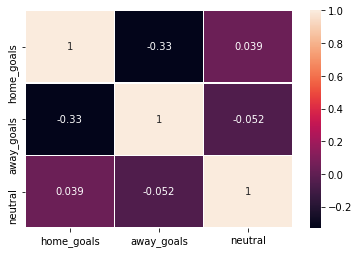

In [19]:
# Let's see if there's a correlation between the results and whether the game was on neutral ground
sns.heatmap(data.corr(),annot=True, linewidths=0.5)

Looks like there is a very small correlation between the number of home goals and whether the game was 'neutral' or not.

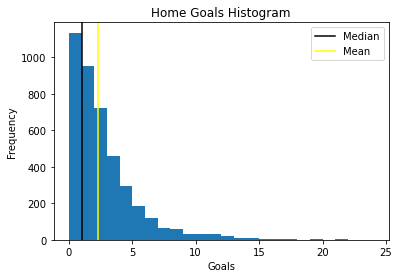

In [20]:
# Let's visualise the home goals
plt.hist(data['home_goals'], bins=max(data['home_goals']))
plt.axvline(np.median(data['home_goals']), color='Black')
plt.axvline(np.mean(data['home_goals']), color='Yellow')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.title('Home Goals Histogram')
plt.legend(['Median','Mean'])
plt.show()

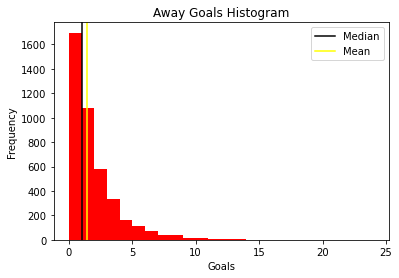

In [21]:
# Let's visualise the away goals
plt.hist(data['away_goals'], bins=max(data['away_goals']), color='Red')
plt.axvline(np.median(data['away_goals']), color='Black')
plt.axvline(np.mean(data['away_goals']), color='Yellow')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.title('Away Goals Histogram')
plt.legend(['Median','Mean'])
plt.show()

# Home Advantage

The two plots above don't tell us very much. For example it doesn't make sense to label teams 'home' and 'away' if neither team is playing in their home country. So I wanted to see if playing at home has a significant difference on a teams performance. 

In [22]:
# Let's create a separate dataframe with all the games that had a team playing at home
homeadv_data = data[data['neutral']==0]
homeadv_data = homeadv_data.reset_index()
homeadv_data.head()

,index,date,home_team,away_team,home_goals,away_goals,tournament,city,host,neutral,home_result,away_result
0,0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,0,W,L
1,3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,0,W,L
2,5,1975-08-25,Hong Kong,New Zealand,0,2,AFC Championship,Hong Kong,Hong Kong,0,L,W
3,9,1975-08-29,Hong Kong,Malaysia,0,2,AFC Championship,Hong Kong,Hong Kong,0,L,W
4,14,1977-02-19,Chinese Taipei,Indonesia,5,0,AFC Championship,Taipei,Chinese Taipei,0,W,L


In [23]:
# Let's create another dataframe for the games where neither team was playing at home
neut_data = data[data['neutral']==1].reset_index()
neut_data.head()

,index,date,home_team,away_team,home_goals,away_goals,tournament,city,host,neutral,home_result,away_result
0,1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,1,W,L
1,2,1969-11-02,England,France,2,0,Euro,Turin,Italy,1,W,L
2,4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,1,W,L
3,6,1975-08-27,Thailand,Singapore,3,0,AFC Championship,Hong Kong,Hong Kong,1,W,L
4,7,1975-08-27,New Zealand,Malaysia,3,0,AFC Championship,Hong Kong,Hong Kong,1,W,L


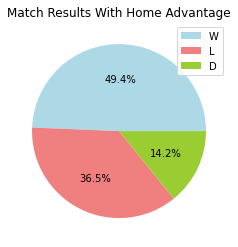

In [24]:
# Let's see the match results of the home team when they were playing at home
plt.pie(homeadv_data['home_result'].value_counts(),autopct='%1.1f%%',colors=['lightblue', 'lightcoral', 'yellowgreen'])
plt.title('Match Results With Home Advantage')
plt.legend(['W', 'L', 'D'])
plt.show()

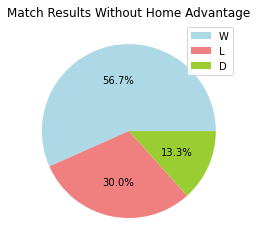

In [25]:
# Let's compare this to the match results of games where neither team was playing at home
plt.pie(neut_data['home_result'].value_counts(),autopct='%1.1f%%',colors=['lightblue', 'lightcoral', 'yellowgreen'])
plt.title('Match Results Without Home Advantage')
plt.legend(['W', 'L', 'D'])
plt.show()

Text(0.5, 1.0, 'Home Team Performance Comparison')

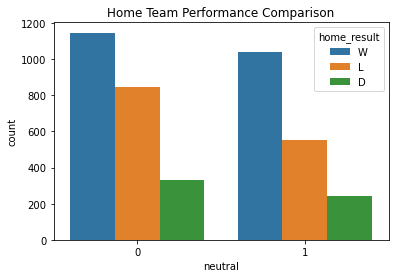

In [26]:
# Let's see a comparison on a bar chart
sns.countplot(x=data['neutral'], hue=data['home_result'])
plt.title('Home Team Performance Comparison')

There seems to be something odd about the neutral data set. We would expect there to be roughly equal numbers of wins and losses in this data set. If that were true the proportions would ideally look like this:
* W: 0.4333875
* L: 0.4333875
* D: 0.1332250

In [27]:
# To test this I'm going to randomly re-order most of the matches in the neutral data set to see if the proportions turn out as expected
length = neut_data['home_result'].count()
length = int(length)
random_swaps = np.random.randint(length, size=round(length*0.7))

# for loop to swap the rows
rand_neut_data = neut_data[['index','date', 'tournament', 'city', 'host', 'neutral']]
home_team = []
away_team = []
home_goals = []
away_goals = []
for i in range(length):
    if i in random_swaps:
        row = [neut_data['away_team'][i],neut_data['home_team'][i],neut_data['away_goals'][i],neut_data['home_goals'][i]]
    else:
        row = [neut_data['home_team'][i],neut_data['away_team'][i],neut_data['home_goals'][i],neut_data['away_goals'][i]]
    #Create the values in the columns
    home_team.append(row[0])
    away_team.append(row[1])
    home_goals.append(row[2])
    away_goals.append(row[3])
                           
# Create the new columns
rand_neut_data['home_team'] = home_team 
rand_neut_data['away_team'] = away_team
rand_neut_data['home_goals'] = home_goals
rand_neut_data['away_goals'] = away_goals
rand_neut_data.head(10)

<ipython-input-27-a90bda71a9e4>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rand_neut_data['home_team'] = home_team
<ipython-input-27-a90bda71a9e4>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rand_neut_data['away_team'] = away_team
<ipython-input-27-a90bda71a9e4>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,index,date,tournament,city,host,neutral,home_team,away_team,home_goals,away_goals
0,1,1969-11-01,Euro,Aosta,Italy,1,Denmark,England,4,3
1,2,1969-11-02,Euro,Turin,Italy,1,England,France,2,0
2,4,1975-08-25,AFC Championship,Hong Kong,Hong Kong,1,Thailand,Australia,3,2
3,6,1975-08-27,AFC Championship,Hong Kong,Hong Kong,1,Thailand,Singapore,3,0
4,7,1975-08-27,AFC Championship,Hong Kong,Hong Kong,1,New Zealand,Malaysia,3,0
5,8,1975-08-29,AFC Championship,Hong Kong,Hong Kong,1,Singapore,Australia,0,3
6,10,1975-08-31,AFC Championship,Hong Kong,Hong Kong,1,New Zealand,Australia,3,2
7,11,1975-08-31,AFC Championship,Hong Kong,Hong Kong,1,Thailand,Malaysia,3,0
8,12,1975-09-02,AFC Championship,Hong Kong,Hong Kong,1,Malaysia,Australia,0,5
9,13,1975-09-02,AFC Championship,Hong Kong,Hong Kong,1,Thailand,New Zealand,1,3


In [28]:
# Let's add the home and away result columns again
rand_neut_data['home_result'] = [result(rand_neut_data['home_goals'][i], rand_neut_data['away_goals'][i]) for i in range(len(rand_neut_data))]
rand_neut_data['away_result'] = [result(rand_neut_data['away_goals'][i], rand_neut_data['home_goals'][i]) for i in range(len(rand_neut_data))]
# Let's see the new dataframe
rand_neut_data.head(10)

<ipython-input-28-3fc275c14da6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rand_neut_data['home_result'] = [result(rand_neut_data['home_goals'][i], rand_neut_data['away_goals'][i]) for i in range(len(rand_neut_data))]


,index,date,tournament,city,host,neutral,home_team,away_team,home_goals,away_goals,home_result,away_result
0,1,1969-11-01,Euro,Aosta,Italy,1,Denmark,England,4,3,W,L
1,2,1969-11-02,Euro,Turin,Italy,1,England,France,2,0,W,L
2,4,1975-08-25,AFC Championship,Hong Kong,Hong Kong,1,Thailand,Australia,3,2,W,L
3,6,1975-08-27,AFC Championship,Hong Kong,Hong Kong,1,Thailand,Singapore,3,0,W,L
4,7,1975-08-27,AFC Championship,Hong Kong,Hong Kong,1,New Zealand,Malaysia,3,0,W,L
5,8,1975-08-29,AFC Championship,Hong Kong,Hong Kong,1,Singapore,Australia,0,3,L,W
6,10,1975-08-31,AFC Championship,Hong Kong,Hong Kong,1,New Zealand,Australia,3,2,W,L
7,11,1975-08-31,AFC Championship,Hong Kong,Hong Kong,1,Thailand,Malaysia,3,0,W,L
8,12,1975-09-02,AFC Championship,Hong Kong,Hong Kong,1,Malaysia,Australia,0,5,L,W
9,13,1975-09-02,AFC Championship,Hong Kong,Hong Kong,1,Thailand,New Zealand,1,3,L,W


In [29]:
# Let's see the proportions of wins and losses
rand_neut_data['home_result'].value_counts() / len(rand_neut_data['home_result'])

L    0.438825
W    0.427950
D    0.133225
Name: home_result, dtype: float64

This data has a much better distribution, I think the uncleaned data had a bias towards wins for the home team because it's assumed that the home team is more likely to win.

If it's assumed that P(Win) & P(Loss) are independent and equal, and P(Draw) = P(Win)*P(Loss) (the intersection);
Then P(Win) = 0.414 (sqrt(2)-1), P(Draw) = 0.172 (3-2*sqrt(2)), P(Loss) = 0.414 (sqrt(2)-1)
It's worth noting that these are very similar to the real values.

In [30]:
# Create the cleaned dataframe
clean_data = pd.merge(rand_neut_data, homeadv_data, how = 'outer')
clean_data.head()

,index,date,tournament,city,host,neutral,home_team,away_team,home_goals,away_goals,home_result,away_result
0,1,1969-11-01,Euro,Aosta,Italy,1,Denmark,England,4,3,W,L
1,2,1969-11-02,Euro,Turin,Italy,1,England,France,2,0,W,L
2,4,1975-08-25,AFC Championship,Hong Kong,Hong Kong,1,Thailand,Australia,3,2,W,L
3,6,1975-08-27,AFC Championship,Hong Kong,Hong Kong,1,Thailand,Singapore,3,0,W,L
4,7,1975-08-27,AFC Championship,Hong Kong,Hong Kong,1,New Zealand,Malaysia,3,0,W,L


In [31]:
# Check the cleaned data
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4163 entries, 0 to 4162
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        4163 non-null   int64 
 1   date         4163 non-null   object
 2   tournament   4163 non-null   object
 3   city         4163 non-null   object
 4   host         4163 non-null   object
 5   neutral      4163 non-null   int64 
 6   home_team    4163 non-null   object
 7   away_team    4163 non-null   object
 8   home_goals   4163 non-null   int64 
 9   away_goals   4163 non-null   int64 
 10  home_result  4163 non-null   object
 11  away_result  4163 non-null   object
dtypes: int64(4), object(8)
memory usage: 292.7+ KB


Text(0.5, 1.0, 'Correlations')

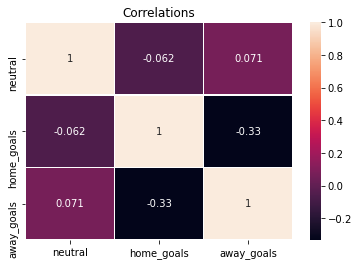

In [32]:
sns.heatmap(clean_data[['neutral', 'home_goals', 'away_goals']].corr(),annot=True, linewidths=0.5)
plt.title('Correlations')

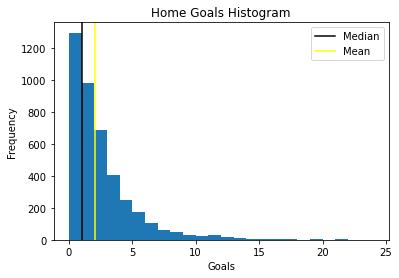

In [33]:
# Let's visualise the home score
plt.hist(clean_data['home_goals'], bins=max(clean_data['home_goals']))
plt.axvline(np.median(clean_data['home_goals']), color='Black')
plt.axvline(np.mean(clean_data['home_goals']), color='Yellow')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.title('Home Goals Histogram')
plt.legend(['Median','Mean'])
plt.show()

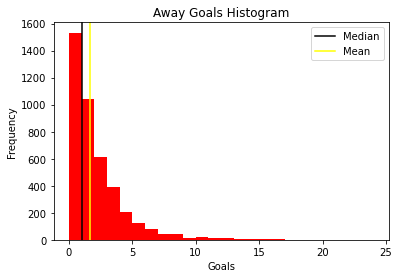

In [34]:
# Let's visualise the away score
plt.hist(clean_data['away_goals'], bins=max(clean_data['away_goals']), color='Red')
plt.axvline(np.median(clean_data['away_goals']), color='Black')
plt.axvline(np.mean(clean_data['away_goals']), color='Yellow')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.title('Away Goals Histogram')
plt.legend(['Median','Mean'])
plt.show()

<AxesSubplot:xlabel='home_result', ylabel='count'>

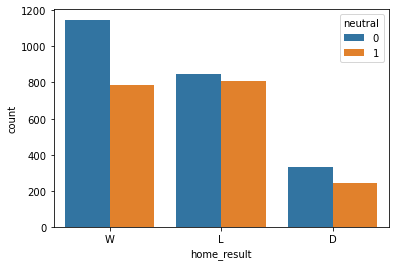

In [35]:
# Comparing the results of matches 
sns.countplot(x=clean_data['home_result'], hue=clean_data['neutral'])

In [36]:
# Let's now run some 1 sample T-tests to see if our results are statistically significant
# Null hypothesis: A team's performance is not affected by where they are playing

# Win
t, p_win = ttest_1samp(homeadv_data['home_result'].apply(lambda x: 1 if x == 'W' else 0), 0.4333875)
print('p_win is '+str(p_win))

# Draw
t, p_draw = ttest_1samp(homeadv_data['home_result'].apply(lambda x: 1 if x == 'D' else 0), 0.133225)
print('p_draw is '+str(p_draw))

# Loss
t, p_loss = ttest_1samp(homeadv_data['home_result'].apply(lambda x: 1 if x == 'L' else 0), 0.4333875)
print('p_loss is '+str(p_loss))

p_win is 7.560463963195833e-09
p_draw is 0.2489266632964016
p_loss is 8.911742343161035e-12


Looks like playing at home does mean the home team is more likely to win and less likely to lose. However the location a team is playing at has no affect on the likelihood of drawing

In [37]:
# Let's do a 1 sample t-test on the number of home goals to see if there a significant increase in the number of goals scored
# Null hypothesis is that there is no significant change in the number of goals scored
t, p_val = ttest_1samp(homeadv_data['home_goals'], np.mean(clean_data['home_goals']))
print('P value is '+str(p_val))

P value is 0.009901842610039204


# Countries

I want to turn my attention to looking at the performances of different countries. First I want to create a separate dataframe for each country which containing the matches they have played. 

In [38]:

# List of countries
countries_home = clean_data['home_team'].unique()
countries_away = clean_data['away_team'].unique()
dont_add = []
add = []
for country in countries_away:
    if country in countries_home:
        dont_add.append(country)
    else:
        add.append(country)
unsorted_countries = np.concatenate([countries_home,add])
#Sort the countries alphabetically
countries = np.sort(unsorted_countries)
# Create a separate dataframe for each country
country_data = []
for i in range(len(countries)):
    country = countries[i]
    home_matches = clean_data[clean_data['home_team'] == country]
    away_matches = clean_data[clean_data['away_team'] == country]
    matches = pd.merge(home_matches, away_matches, how='outer')
    country_data.append(matches)
# United States dataframe
US_data = country_data[180]
US_data.head()

,index,date,tournament,city,host,neutral,home_team,away_team,home_goals,away_goals,home_result,away_result
0,377,1991-04-22,CONCACAF Championship,Port-au-Prince,Haiti,1,United States,Trinidad and Tobago,10,0,W,L
1,382,1991-04-28,CONCACAF Championship,Port-au-Prince,Haiti,1,United States,Canada,5,0,W,L
2,438,1991-11-19,FIFA World Cup,Guangzhou,China PR,1,United States,Brazil,5,0,W,L
3,443,1991-11-21,FIFA World Cup,Foshan,China PR,1,United States,Japan,3,0,W,L
4,452,1991-11-27,FIFA World Cup,Guangzhou,China PR,1,United States,Germany,5,2,W,L


I would like to modfiy this dataframe so that instead of having home_team and away_team, have country and opponents. Similarly with home goals and away goals. I would also like one results columnn just for the result of the country.

In [39]:
# Create the individual dataframes
clean_country = []
for i in range(len(country_data)):
    country_name = countries[i]
    country = country_data[i]
    home_country = country[country['home_team'] == country_name][['index', 'date', 'tournament', 'neutral', 'home_team', 'away_team', 'home_goals', 'away_goals','home_result']]
    home_country.rename(columns = {'home_team':'country', 'away_team':'opponent', 'home_goals':'goals_for', 'away_goals':'goals_against', 'home_result':'result'}, inplace=True)
    away_country =  country[country['away_team'] == country_name][['index', 'date', 'tournament', 'neutral', 'away_team', 'home_team','away_goals', 'home_goals','away_result']]
    away_country.rename(columns = {'away_team':'country', 'home_team':'opponent', 'away_goals':'goals_for', 'home_goals':'goals_against', 'away_result':'result'}, inplace=True)
    new_country = pd.merge(home_country, away_country, how = 'outer')
    clean_country.append(new_country)

# US cleaned data
US = clean_country[180]
US.head(10)

,index,date,tournament,neutral,country,opponent,goals_for,goals_against,result
0,377,1991-04-22,CONCACAF Championship,1,United States,Trinidad and Tobago,10,0,W
1,382,1991-04-28,CONCACAF Championship,1,United States,Canada,5,0,W
2,438,1991-11-19,FIFA World Cup,1,United States,Brazil,5,0,W
3,443,1991-11-21,FIFA World Cup,1,United States,Japan,3,0,W
4,452,1991-11-27,FIFA World Cup,1,United States,Germany,5,2,W
5,454,1991-11-30,FIFA World Cup,1,United States,Norway,2,1,W
6,558,1994-03-18,Algarve Cup,1,United States,Sweden,1,0,W
7,599,1994-08-17,CONCACAF Championship,1,United States,Trinidad and Tobago,11,1,W
8,660,1995-03-14,Algarve Cup,1,United States,Finland,2,0,W
9,672,1995-03-19,Algarve Cup,1,United States,Norway,3,3,D


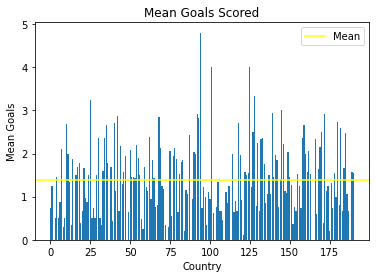

In [40]:
# Now that the country data has been cleaned lets do some EDA
# Let's create a list with the mean goals scored for and against each country

country_goals_for = [clean_country[i]['goals_for'].mean() for i in range(len(clean_country))]
country_goals_against = [clean_country[i]['goals_against'].mean() for i in range(len(clean_country))]

# Now let's visualise this with a bar chart
plt.bar(list(range(len(country_data))),country_goals_for)
plt.axhline(np.mean(country_goals_for), color='Yellow')
plt.xlabel('Country')
plt.ylabel('Mean Goals')
plt.title('Mean Goals Scored')
plt.legend(['Mean'])
plt.show()

Analysing data for all 191 countries simultaneously will be messy (as the graph above shows). So, I would now like to do some EDA on specific countries: USA, England and Brazil. There's no particularly good reason to pick these countries. I'm English, I'm aware that Brazil is a good team (at least in men's football) and a lot of Kaggler's seem yo be from the USA. 

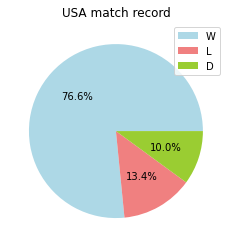

In [41]:
# First let's get the dataframes for the USA, England and Brazil
USA = clean_country[180] 
Eng = clean_country[54]
Bra = clean_country[25]

#Let's visualise their match records
# USA
plt.pie(USA['result'].value_counts(),autopct='%1.1f%%',colors=['lightblue', 'lightcoral', 'yellowgreen'])
plt.legend(['W', 'L', 'D'])
plt.title('USA match record')
plt.show()

In [42]:
USA.head(10)

,index,date,tournament,neutral,country,opponent,goals_for,goals_against,result
0,377,1991-04-22,CONCACAF Championship,1,United States,Trinidad and Tobago,10,0,W
1,382,1991-04-28,CONCACAF Championship,1,United States,Canada,5,0,W
2,438,1991-11-19,FIFA World Cup,1,United States,Brazil,5,0,W
3,443,1991-11-21,FIFA World Cup,1,United States,Japan,3,0,W
4,452,1991-11-27,FIFA World Cup,1,United States,Germany,5,2,W
5,454,1991-11-30,FIFA World Cup,1,United States,Norway,2,1,W
6,558,1994-03-18,Algarve Cup,1,United States,Sweden,1,0,W
7,599,1994-08-17,CONCACAF Championship,1,United States,Trinidad and Tobago,11,1,W
8,660,1995-03-14,Algarve Cup,1,United States,Finland,2,0,W
9,672,1995-03-19,Algarve Cup,1,United States,Norway,3,3,D


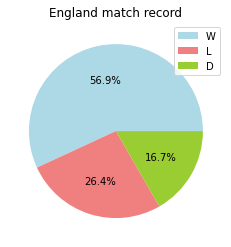

In [43]:
# England
plt.pie(Eng['result'].value_counts(),autopct='%1.1f%%',colors=['lightblue', 'lightcoral', 'yellowgreen'])
plt.legend(['W', 'L', 'D'])
plt.title('England match record')
plt.show()

In [44]:
Eng.head(10)

,index,date,tournament,neutral,country,opponent,goals_for,goals_against,result
0,2,1969-11-02,Euro,1,England,France,2,0,W
1,26,1979-07-19,Euro,1,England,Finland,3,1,W
2,38,1979-07-27,Euro,1,England,Sweden,0,0,D
3,218,1987-06-11,UEFA Euro,1,England,Sweden,2,3,L
4,219,1987-06-13,UEFA Euro,1,England,Italy,1,2,L
5,678,1995-06-06,FIFA World Cup,1,England,Canada,3,2,W
6,683,1995-06-08,FIFA World Cup,1,England,Norway,0,2,L
7,690,1995-06-10,FIFA World Cup,1,England,Nigeria,3,2,W
8,695,1995-06-13,FIFA World Cup,1,England,Germany,0,3,L
9,1333,2001-06-24,UEFA Euro,1,England,Russia,1,1,D


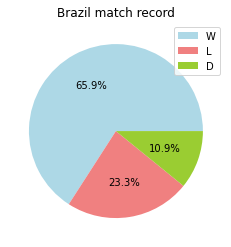

In [45]:
# Brazil
plt.pie(Bra['result'].value_counts(),autopct='%1.1f%%',colors=['lightblue', 'lightcoral', 'yellowgreen'])
plt.legend(['W', 'L', 'D'])
plt.title('Brazil match record')
plt.show()

In [46]:
Bra.head(10)

,index,date,tournament,neutral,country,opponent,goals_for,goals_against,result
0,444,1991-11-21,FIFA World Cup,1,Brazil,Sweden,0,2,L
1,682,1995-06-07,FIFA World Cup,1,Brazil,Japan,1,2,L
2,838,1996-07-23,Olympic Games,1,Brazil,Japan,2,0,W
3,844,1996-07-28,Olympic Games,1,Brazil,China PR,2,3,L
4,939,1998-03-06,Copa América,1,Brazil,Venezuela,14,0,W
5,947,1998-03-10,Copa América,1,Brazil,Chile,7,0,W
6,1054,1999-06-19,FIFA World Cup,1,Brazil,Mexico,7,1,W
7,1075,1999-06-27,FIFA World Cup,1,Brazil,Germany,3,3,D
8,1080,1999-07-01,FIFA World Cup,1,Brazil,Nigeria,4,3,W
9,1083,1999-07-10,FIFA World Cup,1,Brazil,Norway,0,0,D


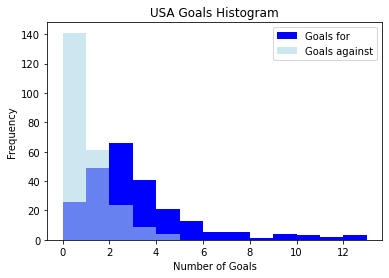

In [47]:
# I now want to make a histogram for the frequency of goals scored for/against
# USA
plt.hist(USA['goals_for'], bins=max(USA['goals_for']),color='blue')
plt.hist(USA['goals_against'], bins=max(USA['goals_against']),color='lightblue', alpha=0.6)
plt.xlabel('Number of Goals')
plt.ylabel('Frequency')
plt.title('USA Goals Histogram')
plt.legend(['Goals for','Goals against'])
plt.show()

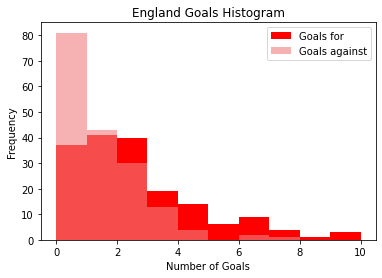

In [48]:
# England
plt.hist(Eng['goals_for'], bins=max(Eng['goals_for']),color='red')
plt.hist(Eng['goals_against'], bins=max(Eng['goals_against']),color='lightcoral', alpha=0.6)
plt.xlabel('Number of Goals')
plt.ylabel('Frequency')
plt.title('England Goals Histogram')
plt.legend(['Goals for','Goals against'])
plt.show()

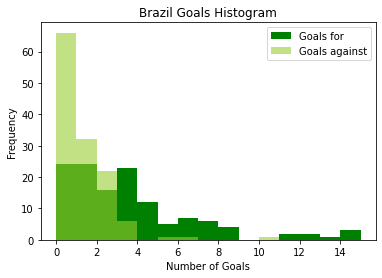

In [49]:
# Brazil
plt.hist(Bra['goals_for'], bins=max(Bra['goals_for']),color='green')
plt.hist(Bra['goals_against'], bins=max(Bra['goals_against']),color='yellowgreen', alpha=0.6)
plt.xlabel('Number of Goals')
plt.ylabel('Frequency')
plt.title('Brazil Goals Histogram')
plt.legend(['Goals for','Goals against'])
plt.show()

Interestingly the frequency of goals for and goals against look like they have different distributions. To explain this I want suggest that both histograms have a Gamma distribution: Γ(t,a) = (a^t/(t-1)!)*x^(t-1)e^(-ax), x>0; Γ ~ (μ = t/a, σ^2 = t/a^2); Γ(1,a) = a*e^(-ax) looks like the distribution for goals_against, Γ(t,a) w/ t>1 looks like the distribution for goals_for.

In [50]:
# If the goals_against histogram is distributed like: Γ ~ (μ = 1/a, σ = 1/a), then the std = mean
print('mean: '+str(US['goals_against'].mean()))
print('std: '+str(US['goals_against'].std()))

mean: 0.6401673640167364
std: 0.9461429736004188


The std and mean are quite different so looks like the histogram does not have a Gamma distribution. I'm not aware of any other distributions that have both those shapes. Maybe the distribution of this data is a task for someone with more stats knowledge than me.

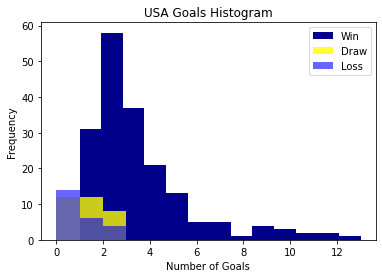

In [51]:
# Now I want to look at the distribution of goals scored for each type of result
#USA
plt.hist(USA[USA['result']=='W']['goals_for'], bins=max(USA[USA['result']=='W']['goals_for']), color='darkblue')
plt.hist(USA[USA['result']=='D']['goals_for'], bins=max(USA[USA['result']=='D']['goals_for']), color='yellow', alpha=0.8)
plt.hist(USA[USA['result']=='L']['goals_for'], bins=max(USA[USA['result']=='L']['goals_for']), color='blue', alpha=0.6)
plt.xlabel('Number of Goals')
plt.ylabel('Frequency')
plt.title('USA Goals Histogram')
plt.legend(['Win', 'Draw', 'Loss'])
plt.show()

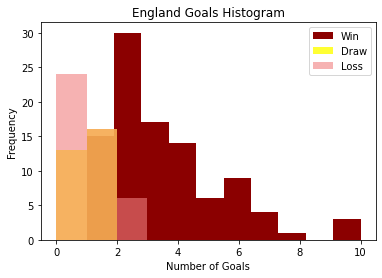

In [52]:
# England
plt.hist(Eng[Eng['result']=='W']['goals_for'], bins=max(Eng[Eng['result']=='W']['goals_for']), color='darkred')
plt.hist(Eng[Eng['result']=='D']['goals_for'], bins=max(Eng[Eng['result']=='D']['goals_for']), color='yellow', alpha=0.8)
plt.hist(Eng[Eng['result']=='L']['goals_for'], bins=max(Eng[Eng['result']=='L']['goals_for']), color='lightcoral', alpha=0.6)
plt.xlabel('Number of Goals')
plt.ylabel('Frequency')
plt.title('England Goals Histogram')
plt.legend(['Win', 'Draw', 'Loss'])
plt.show()

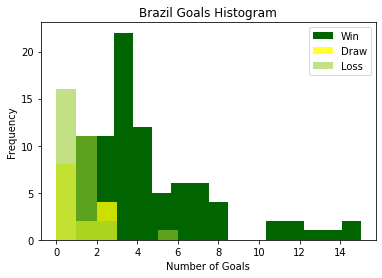

In [53]:
# Brazil
plt.hist(Bra[Bra['result']=='W']['goals_for'], bins=max(Bra[Bra['result']=='W']['goals_for']), color='darkgreen')
plt.hist(Bra[Bra['result']=='D']['goals_for'], bins=max(Bra[Bra['result']=='D']['goals_for']), color='yellow', alpha=0.8)
plt.hist(Bra[Bra['result']=='L']['goals_for'], bins=max(Bra[Bra['result']=='L']['goals_for']), color='yellowgreen', alpha=0.6)
plt.xlabel('Number of Goals')
plt.ylabel('Frequency')
plt.title('Brazil Goals Histogram')
plt.legend(['Win', 'Draw', 'Loss'])
plt.show()

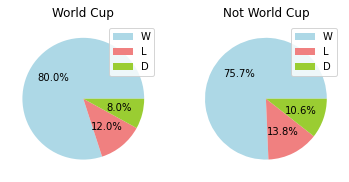

In [54]:
# I want to compare how well these teams perform in qualifying compared to the actual World Cup
# USA
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(USA[USA['tournament'] == 'FIFA World Cup']['result'].value_counts(),autopct='%1.1f%%',colors=['lightblue', 'lightcoral', 'yellowgreen'])
ax1.set_title('World Cup')
ax1.legend(['W', 'L', 'D'])

ax2.pie(USA[USA['tournament'] != 'FIFA World Cup']['result'].value_counts(),autopct='%1.1f%%',colors=['lightblue', 'lightcoral', 'yellowgreen'])
ax2.set_title('Not World Cup')
ax2.legend(['W', 'L', 'D'])
plt.show()

Looks like the USA performs slightly better at World Cups than at other competitions.

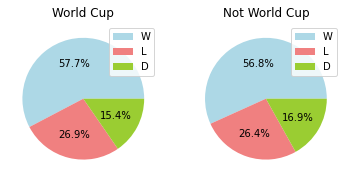

In [55]:
# England
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(Eng[Eng['tournament'] == 'FIFA World Cup']['result'].value_counts(),autopct='%1.1f%%',colors=['lightblue', 'lightcoral', 'yellowgreen'])
ax1.set_title('World Cup')
ax1.legend(['W', 'L', 'D'])

ax2.pie(Eng[Eng['tournament'] != 'FIFA World Cup']['result'].value_counts(),autopct='%1.1f%%',colors=['lightblue', 'lightcoral', 'yellowgreen'])
ax2.set_title('Not World Cup')
ax2.legend(['W', 'L', 'D'])
plt.show()

Looks like England performs just as well at the World Cup as they do in other competitions.

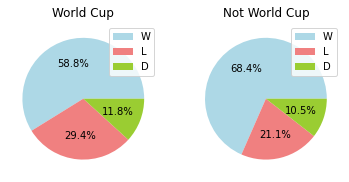

In [56]:
# Brazil
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(Bra[Bra['tournament'] == 'FIFA World Cup']['result'].value_counts(),autopct='%1.1f%%',colors=['lightblue', 'lightcoral', 'yellowgreen'])
ax1.set_title('World Cup')
ax1.legend(['W', 'L', 'D'])

ax2.pie(Bra[Bra['tournament'] != 'FIFA World Cup']['result'].value_counts(),autopct='%1.1f%%',colors=['lightblue', 'lightcoral', 'yellowgreen'])
ax2.set_title('Not World Cup')
ax2.legend(['W', 'L', 'D'])
plt.show()

Looks like Brazil performs slightly worse at World Cups than at other competitions. I want to now rank these countries in some way by giving them a score. The formula is quite simple: Score = (3xWins + 1xDraws)/total games.
Now I want to create a pivot table that for every country, contains the number of games, wins, draws and losses as well as score.

In [57]:
 # For loop to create the columns
country_games = []
country_wins = []
country_draws = []
country_losses=[]
for i in range(len(countries)):
    nation = clean_country[i]
    nation_games= nation['result'].count()
    country_games.append(nation_games)
    nation_wins = nation[nation['result']=='W']['result'].count()
    country_wins.append(nation_wins)
    nation_draws = nation[nation['result']=='D']['result'].count()
    country_draws.append(nation_draws)
    nation_losses = nation[nation['result']=='L']['result'].count()
    country_losses.append(nation_losses)

# Create the table
results_table = pd.DataFrame({'Country': countries,'Games': country_games,'Wins': country_wins, 'Draws': country_draws, 'Losses': country_losses})

# Score system
results_table['Score'] = round((results_table['Wins']*3 + results_table['Draws'])/results_table['Games'],2)

results_table.head(10)

,Country,Games,Wins,Draws,Losses,Score
0,Albania,19,3,2,14,0.58
1,Algeria,35,13,7,15,1.31
2,American Samoa,5,0,0,5,0.00
3,Andorra,6,0,0,6,0.00
4,Angola,13,4,4,5,1.23
5,Anguilla,6,1,0,5,0.50
6,Antigua and Barbuda,17,5,1,11,0.94
7,Argentina,58,28,7,23,1.57
8,Armenia,20,2,3,15,0.45
9,Aruba,6,1,0,5,0.50


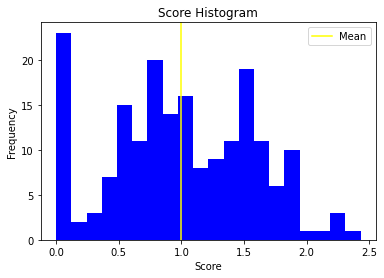

In [58]:
# Histogram of scores
plt.hist(results_table['Score'],bins=20,color='blue')
plt.axvline(x=np.mean(results_table['Score']),color='yellow')
plt.title('Score Histogram')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend(['Mean'])
plt.show()

In [59]:
# Looks like there are a lot of countries with a score of 0, let's see which countries these are
no_score = results_table[results_table['Score']==0]['Country']
no_score

2                American Samoa
3                       Andorra
13                      Bahamas
15                   Bangladesh
19                       Belize
26       British Virgin Islands
31               Cayman Islands
37                      Comoros
48                     Djibouti
58                     Eswatini
73                   Guadeloupe
88                         Iraq
97                       Kosovo
98                       Kuwait
103                       Libya
109                    Maldives
113                   Mauritius
121                       Nepal
164                       Syria
165       São Tomé and Príncipe
175    Turks and Caicos Islands
188                  Yugoslavia
Name: Country, dtype: object

In [60]:
#Let's see the results table for our countries
results_table.loc[[180,25,54]]

,Country,Games,Wins,Draws,Losses,Score
180,United States,239,183,32,24,2.43
25,Brazil,129,85,14,30,2.09
54,England,174,99,29,46,1.87


I now want to re-order the table so that the table is arranged by score with the highest score at the top. I also want to exclude countries who have played less than 10 games, as their results are often skewed. I may make further amendments to the table for other outliers.

In [61]:
# Sort the scores so they are in order
sorted_scores = np.sort(results_table['Score'])
# Create the columns
sorted_games = []
sorted_country = []
sorted_wins = []
sorted_draws = []
sorted_losses = []
# Find the country with these scores
for i in range(len(sorted_scores)):
    score = sorted_scores[-1*(i+1)]
    for j in range(len(sorted_scores)):
        if results_table['Score'][j] == score and results_table['Games'][j] > 10 and results_table['Country'][j] not in sorted_country:
            # Add the countries results in order to create the rows
            sorted_country.append(results_table['Country'][j])
            sorted_games.append(results_table['Games'][j])
            sorted_wins.append(results_table['Wins'][j])
            sorted_draws.append(results_table['Draws'][j])
            sorted_losses.append(results_table['Losses'][j])

# Create the table            
ranking_table = pd.DataFrame({'Country': sorted_country,'Games': sorted_games,'Wins': sorted_wins, 'Draws': sorted_draws, 'Losses': sorted_losses})
ranking_table['Score'] = round((ranking_table['Wins']*3 + ranking_table['Draws'])/ranking_table['Games'],2)

ranking_table.head(10)

,Country,Games,Wins,Draws,Losses,Score
0,United States,239,183,32,24,2.43
1,Germany,271,190,38,43,2.24
2,Brazil,129,85,14,30,2.09
3,Norway,306,184,42,80,1.94
4,North Korea,86,52,10,24,1.93
5,Italy,170,100,26,44,1.92
6,Nigeria,116,70,12,34,1.91
7,England,174,99,29,46,1.87
8,Dominican Republic,14,8,2,4,1.86
9,Jordan,20,12,1,7,1.85


North Korea is 5th! That's a surprise, the Dominican Republic and Jordan being in the top 10 seems a bit fishy though.

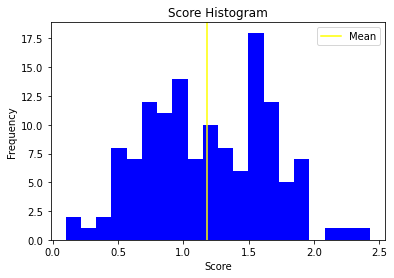

In [62]:
# Histogram of scores
plt.hist(ranking_table['Score'],bins=20,color='blue')
plt.axvline(x=np.mean(ranking_table['Score']),color='yellow')
plt.title('Score Histogram')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend(['Mean'])
plt.show()

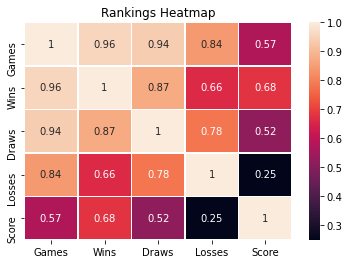

In [63]:
# Heatmap to check for correlations
sns.heatmap(ranking_table.corr(),annot=True,linewidths=0.5)
plt.title('Rankings Heatmap')
plt.show()

I want to make some scatter plots to look at how playing more games affects performance. The correlations on the heatmap look slightly higher than I would have expected,-maybe that's just my poor judgement due to lack of knowledge about the sport-. 

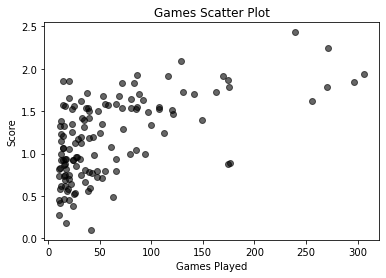

In [64]:
# Games
plt.scatter(y=ranking_table['Score'], x=ranking_table['Games'], color='black', alpha = 0.6)
plt.xlabel('Games Played')
plt.ylabel('Score')
plt.title('Games Scatter Plot')
plt.show()

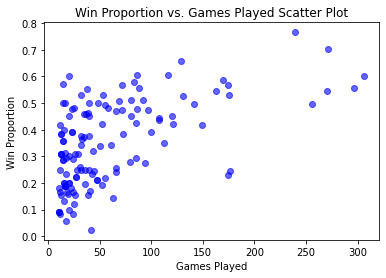

In [65]:
# Wins
plt.scatter(y=ranking_table['Wins']/ranking_table['Games'], x=ranking_table['Games'], color='blue', alpha = 0.6)
plt.xlabel('Games Played')
plt.ylabel('Win Proportion')
plt.title('Win Proportion vs. Games Played Scatter Plot')
plt.show()

I suspect that this graph follows an exponential curve and has a general equation that looks like: y = 1 - exp(-kx)
I will re-arrange this equation to get: -log(1-y) = kx so that I can estimate the value of k using linear regression. First I want to remove outliers from the data.

In [66]:
# Portugal and Finland have played more than 150 games played but have a score less than 1
table = ranking_table[ranking_table['Games'] > 150]
table[table['Score'] < 1]

# Norway, Sweden, China PR and Denmark have played more than 250 games but have a score less than 2
# All the Scandanvian countries (apart from Iceland) are outliers
table = ranking_table[ranking_table['Games'] > 250]
table[table['Score'] < 2]

# Northen Ireland have played more than 50 games but have a score less than 0.5
table = ranking_table[ranking_table['Games'] > 50]
table[table['Score'] < 0.5]

#Estonia have played nearly 50 games and have a really low score of 0.10
table = ranking_table[ranking_table['Games'] < 50]
table[table['Score'] < 0.3]

# Dominican Republic and Jordan have played less than 50 games but have a score of 1.86 and 1.85 respectively
table = ranking_table[ranking_table['Games'] < 50]
table[table['Score'] > 1.5]

,Country,Games,Wins,Draws,Losses,Score
8,Dominican Republic,14,8,2,4,1.86
9,Jordan,20,12,1,7,1.85
17,Haiti,38,21,2,15,1.71
22,Czechoslovakia,20,9,6,5,1.65
26,Uzbekistan,32,17,1,14,1.62
30,Saint Lucia,14,7,1,6,1.57
31,Cuba,16,8,1,7,1.56
32,Paraguay,25,12,3,10,1.56
36,Equatorial Guinea,37,17,6,14,1.54
38,Zimbabwe,39,18,6,15,1.54


In [67]:
# Create a new table with the outliers removed
# There's probably a much more efficent way of doing this but this method will suffice
table_a = ranking_table[ranking_table['Country'] != 'Portugal'] 
table_b = table_a[table_a['Country'] != 'Finland'] 
table_c = table_b[table_b['Country'] != 'Norway']
table_d = table_c[table_c['Country'] != 'Sweden']
table_e = table_d[table_d['Country'] != 'China PR']
table_f = table_e[table_e['Country'] != 'Denmark']
table_g = table_f[table_f['Country'] != 'Northen Ireland']
table_h = table_g[table_g['Country'] != 'Estonia']
table_i = table_h[table_h['Country'] != 'Dominican Republic']
table_j = table_i[table_i['Country'] != 'Jordan']

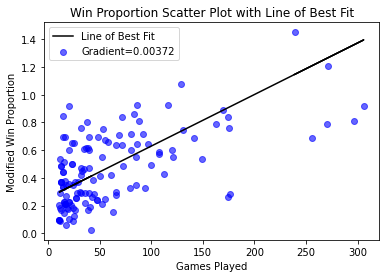

In [68]:
# Linear Regression
line = LinearRegression()
Games = table_j['Games']
Games = Games.values.reshape(-1,1)
line.fit(Games,-np.log1p(-table_j['Wins']/table_j['Games']))
line_y = line.predict(ranking_table['Games'].values.reshape(-1,1))
# Gradient
k= line.coef_[0]
# Intercept
c= line.predict(np.array([0]).reshape(-1,1))[0]

# Scatter Plot with re-arranged variables
plt.scatter(x=ranking_table['Games'], y=-np.log1p(-ranking_table['Wins']/ranking_table['Games']), color='blue', alpha = 0.6)
plt.plot(ranking_table['Games'],line_y, color = 'black')
plt.xlabel('Games Played')
plt.ylabel('Modified Win Proportion')
plt.title('Win Proportion Scatter Plot with Line of Best Fit')
plt.legend(['Line of Best Fit', 'Gradient='+str(round(k,5))])
plt.show()


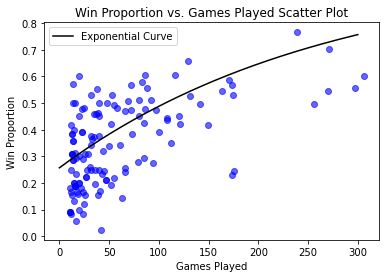

In [69]:
# Here's the original plot with the exponential curve
y_val = np.arange(0,301,1)
plt.scatter(y=ranking_table['Wins']/ranking_table['Games'], x=ranking_table['Games'], color='blue', alpha = 0.6)
plt.plot(1+(c-1)*np.exp(-k*y_val),color='Black')
plt.xlabel('Games Played')
plt.ylabel('Win Proportion')
plt.title('Win Proportion vs. Games Played Scatter Plot')
plt.legend(['Exponential Curve'])
plt.show()

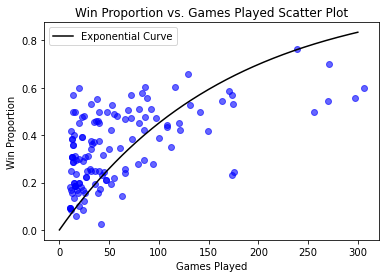

In [70]:
# The exponential curve above doesn't start close to (0,0), (which would be ideal)
# A gradient of 0.006 fits the plot and goes through (0,0)
plt.scatter(y=ranking_table['Wins']/ranking_table['Games'], x=ranking_table['Games'], color='blue', alpha = 0.6)
plt.plot(1-np.exp(-0.006*y_val),color='Black')
plt.xlabel('Games Played')
plt.ylabel('Win Proportion')
plt.title('Win Proportion vs. Games Played Scatter Plot')
plt.legend(['Exponential Curve'])
plt.show()

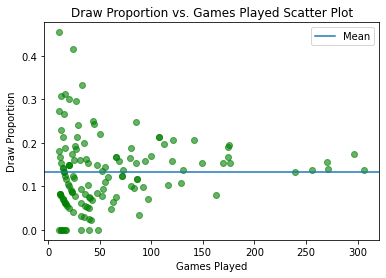

In [71]:
# Draws
plt.scatter(y=ranking_table['Draws']/ranking_table['Games'], x=ranking_table['Games'], color='green', alpha = 0.6)
plt.axhline(y=np.mean(ranking_table['Draws']/ranking_table['Games']))
plt.xlabel('Games Played')
plt.ylabel('Draw Proportion')
plt.title('Draw Proportion vs. Games Played Scatter Plot')
plt.legend(['Mean'])
plt.show()

Interestingly the proportion of draws seems to be converging to a specific value (slightly higher than the mean). Also the points seem to converge to this hypothetical line from two different directions depending on whether their y-coorindate is above or below the hypthetical value. My guess is that the plots follow a first order ODE: dy/dx = r(k-y), r=rate of convergence, k=hypothetical value. I won't try and figure out what r and k are for this, although that would be something I might do in the near future, or maybe one of you reading it can.

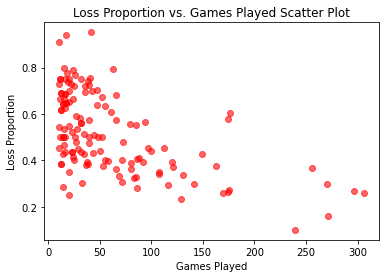

In [72]:
# Losses
plt.scatter(y=ranking_table['Losses']/ranking_table['Games'], x=ranking_table['Games'], color='red', alpha = 0.6)
plt.xlabel('Games Played')
plt.ylabel('Loss Proportion')
plt.title('Loss Proportion vs. Games Played Scatter Plot')
plt.show()

# Conclusion


To sum up what I learned from doing this. First, using common sense checks when cleaning data. As good as the data cleaning tools in Python are, they wouldn't have been able to spot to biased ordering to home and away teams. Second, the importance of visualising data. I'm not a visual learner, but I found plotting simple graphs helped so much with spotting outliers are data trends. 
Next, I want so summarise the conclusions of my EDA: I showed that there is such a things as home advantage. One thing I notice but didn't comment on was that the away goals were less skewed than the home goals. If I were to add anything to this notebook, it would be some boxplots to look into that. I also looked at how experience (number of games played) affects performance, and found essentially what you would expect; That the more experienced a team is the better they do on average. It was also good to have a mathematical model for quantifying the relationship, even if I could have improved it, if I put a bit more effort into it.    

Again, this is my first Kaggle notebook, feedback is greatly appreciated. I essentially wanted to use this as an opportunity to get use to using the various libraries and tools in Python. I wasn't trying to find any new insights in this document, just put some numbers to things I already knew.

Thank you for reading this notebook :) 